In [1]:
import os
from collections import OrderedDict
import logging

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
# Seaborn color cycle
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import numpy as np
import lsst.afw.table as afwTable

import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

# Load the HSC data

We see that for real data, without psf-matched co-adds, the new deblender does not work well. This is likely due to the color gradiant caused by difference size psfs in each filter, and we hope that using PSF-homogenized coadds will eliminate this problem.

In [2]:
filters = ["HSC-G","HSC-R", "HSC-I","HSC-Z",'HSC-Y']
imgFilename = os.path.expandvars("$LSST/deblender/HSC-data/{0}-{1}-9615-2,4.fits")
catFilename = os.path.expandvars("$LSST/deblender/HSC-data/mergeDet-9615-2,4.fits")

mcCalexp = nmf.MulticolorCalExp(filters, imgFilename, catFilename)

INFO:lsst.meas.deblender:Loading filter HSC-G
INFO:lsst.meas.deblender:Loading filter HSC-R
INFO:lsst.meas.deblender:Loading filter HSC-I
INFO:lsst.meas.deblender:Loading filter HSC-Z
INFO:lsst.meas.deblender:Loading filter HSC-Y
INFO:lsst.meas.deblender:Total parents: 12375
INFO:lsst.meas.deblender:Unblended sources: 8761
INFO:lsst.meas.deblender:Sources with multiple peaks: 3614


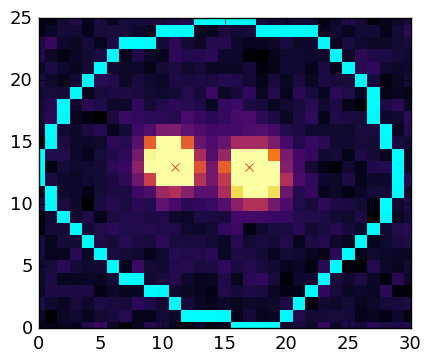

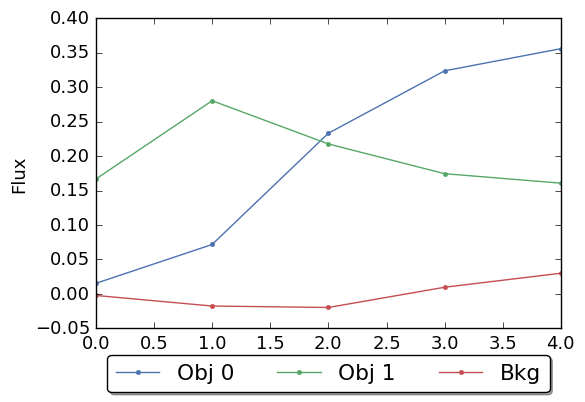

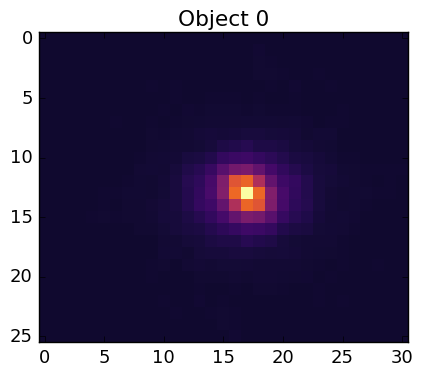

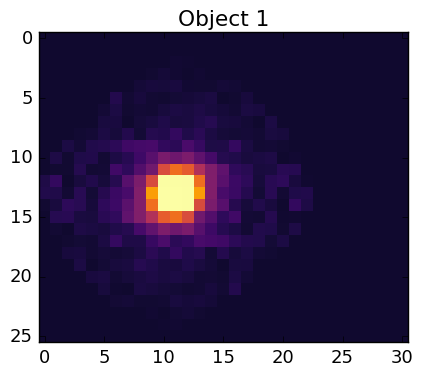

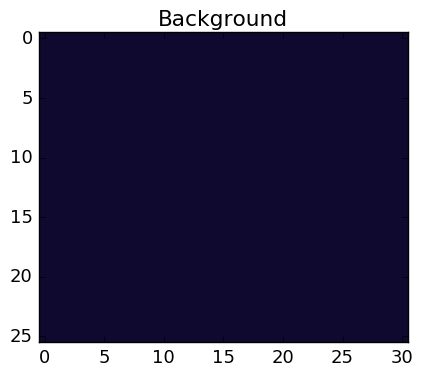

In [3]:
mcCalexp.getParentFootprint(82, mcCalexp.mergedTable["peaks"]==2, filt='HSC-R')
mcCalexp.initNMFParams(includeBkg=True, offsetData=True);

INFO:lsst.meas.deblender:Filter HSC-G
INFO:lsst.meas.deblender:Pixel range: 0.0 to 17.4775350094
INFO:lsst.meas.deblender:Max difference: 1.15060609654
INFO:lsst.meas.deblender:Residual difference 6.2%
INFO:lsst.meas.deblender:Filter HSC-R
INFO:lsst.meas.deblender:Pixel range: 0.0 to 17.4775350094
INFO:lsst.meas.deblender:Max difference: 0.412735369813
INFO:lsst.meas.deblender:Residual difference 1.3%
INFO:lsst.meas.deblender:Filter HSC-I
INFO:lsst.meas.deblender:Pixel range: 0.0 to 17.4775350094
INFO:lsst.meas.deblender:Max difference: 0.844707918123
INFO:lsst.meas.deblender:Residual difference 2.5%
INFO:lsst.meas.deblender:Filter HSC-Z
INFO:lsst.meas.deblender:Pixel range: 0.0 to 17.4775350094
INFO:lsst.meas.deblender:Max difference: 0.570271256402
INFO:lsst.meas.deblender:Residual difference 0.2%
INFO:lsst.meas.deblender:Filter HSC-Y
INFO:lsst.meas.deblender:Pixel range: 0.0 to 17.4775350094
INFO:lsst.meas.deblender:Max difference: 0.888131160646
INFO:lsst.meas.deblender:Residual di

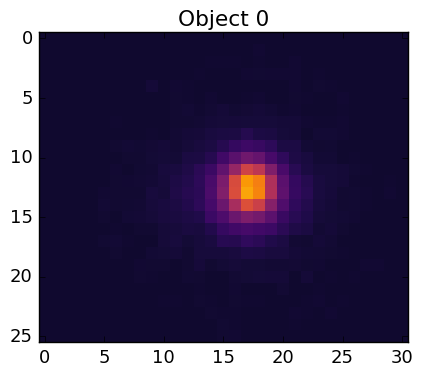

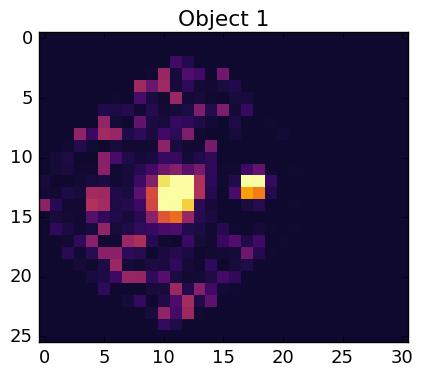

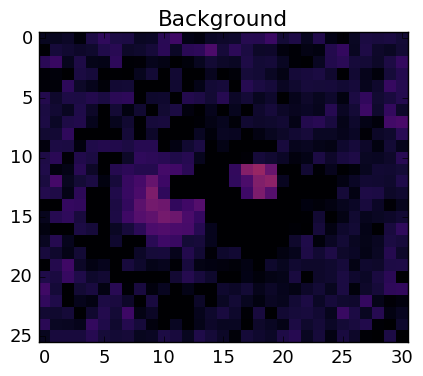

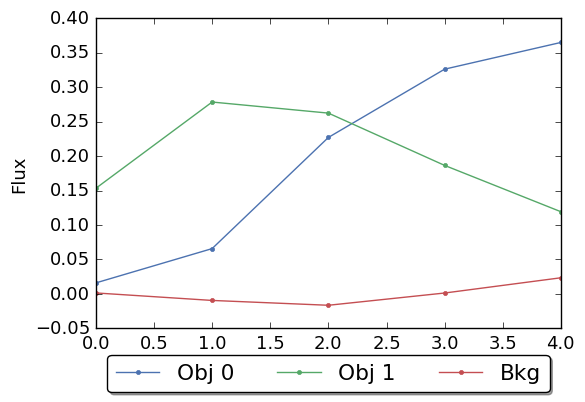

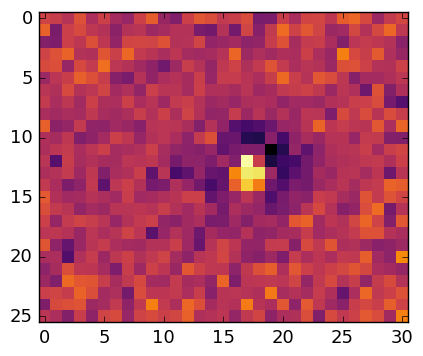

In [23]:
diffOp = mcCalexp.getSymmetryDiffOp()
W,H = mcCalexp.deblend(beta=.01, diffOp=diffOp, steps=100, bkg=3)